# Excercise 13

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats

#### a)

In [15]:
np.random.seed(1)
X = np.random.normal(0, 1, 100)

In [16]:
print(X[:10])
print("Len of X:", len(X))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
Len of X: 100


#### b)

In [17]:
eps = np.random.normal(0, 0.25, 100)

#### c)

In [18]:
beta0 = -1
beta1 = 0.5
Y = beta0 + X*beta1 + eps

In [19]:
print(Y[:10])
print("Len of Y:", len(Y))

print(f"Beta0 = {beta0}, Beta1 = {beta1}")

[-0.29960946 -0.99975128 -1.16321297 -1.38808968 -0.84102415 -2.10842374
  0.05754499 -1.6190286  -0.90703508 -1.11653155]
Len of Y: 100
Beta0 = -1, Beta1 = 0.5


#### d)

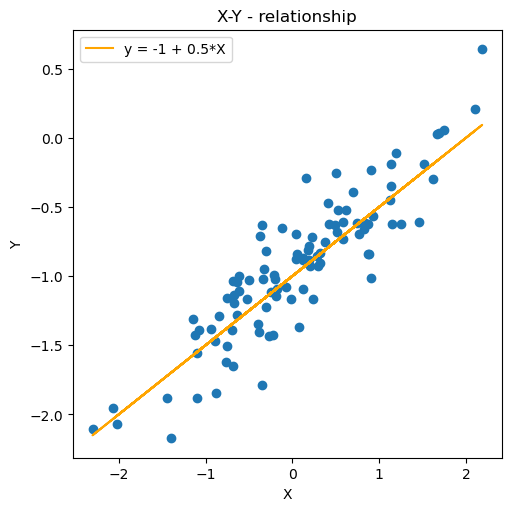

In [20]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.scatter(X, Y)
ax.plot(X, beta0 + beta1*X, label=f"y = {beta0} + {beta1}*X", color="orange")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X-Y - relationship")
ax.legend()
plt.show()
#Comment: Data behaves as model predicted

#### e)

In [21]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

beta1_hat = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean)**2)
beta0_hat = y_mean - beta1_hat * x_mean

print(f"beta0_hat = {beta0_hat:.4f}")
print(f"beta1_hat = {beta1_hat:.4f}")

beta0_hat = -0.9632
beta1_hat = 0.5239


#### f)

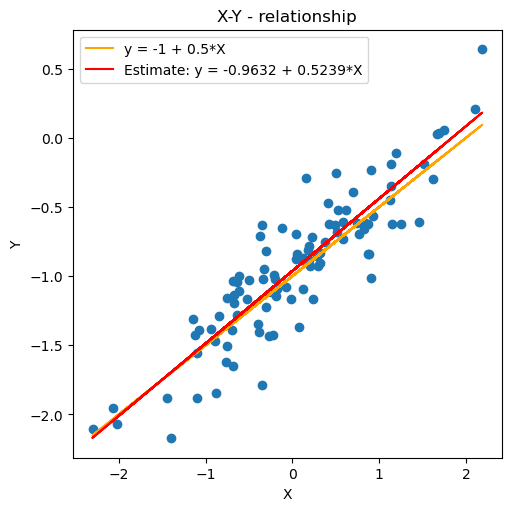

In [22]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.scatter(X, Y)
ax.plot(X, beta0 + beta1*X, label=f"y = {beta0} + {beta1}*X", color="orange")
ax.plot(X, beta0_hat + beta1_hat*X, label=f"Estimate: y = {beta0_hat:.4f} + {beta1_hat:.4f}*X", color="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X-Y - relationship")
ax.legend()
plt.show()

#### g)

In [23]:
reshapedX = X.reshape(-1,1) #przypomnij sobie jak to dziala
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(reshapedX)  # columns: [1, x, x^2]

model = LinearRegression().fit(X_poly, Y)
print("Estimated coefficients:", model.intercept_, model.coef_[1:])

model_lin = LinearRegression().fit(reshapedX, Y)
print("Linear R^2:", model_lin.score(reshapedX, Y))
print("Quadratic R^2:", model.score(X_poly, reshapedX))

Estimated coefficients: -0.9662543007102566 [0.52340491 0.00385565]
Linear R^2: 0.7997346204862734
Quadratic R^2: -0.48295271592714384


score explained:  
 - 1.0 - perfect score  
 - 0.0 - as good as mean  
 - below 0.0 - worse than horizontal line

#### h)

In [24]:
eps = np.random.normal(0, 0.05, 100)

Data follows more closely the linear regression. The estimated values for Beta0 and Beta1 are closer to truth.

#### i)

In [25]:
eps = np.random.normal(0, 0.5, 100)

Data is more scattered, the estimation of Betas became slightly worse.

#### j)

In [26]:
def fit_and_ci(noise_std):
    np.random.seed(1)
    x = np.random.normal(0, 1, 100)
    eps = np.random.normal(0, noise_std, 100)
    y = -1 + 0.5 * x + eps

    # Fit model
    X = x.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Residuals and stats
    n = len(x)
    p = 2  # intercept + slope
    residuals = y - y_pred
    s2 = np.sum(residuals**2) / (n - p)  # residual variance
    x_mean = np.mean(x)
    s_xx = np.sum((x - x_mean)**2)

    # Standard errors
    se_b1 = np.sqrt(s2 / s_xx)
    se_b0 = np.sqrt(s2 * (1/n + x_mean**2 / s_xx))

    # 95% confidence intervals
    t_val = stats.t.ppf(0.975, df=n - p)
    ci_b0 = (model.intercept_ - t_val*se_b0, model.intercept_ + t_val*se_b0)
    ci_b1 = (model.coef_[0] - t_val*se_b1, model.coef_[0] + t_val*se_b1)

    return model.intercept_, model.coef_[0], ci_b0, ci_b1

In [27]:
original = fit_and_ci(noise_std=0.5)
less_noise = fit_and_ci(noise_std=0.25)
more_noise = fit_and_ci(noise_std=1.0)

print("Original noise (σ=0.5):")
print(f"  β₀̂ = {original[0]:.3f}, 95% CI = {original[2]}")
print(f"  β₁̂ = {original[1]:.3f}, 95% CI = {original[3]}\n")

print("Less noise (σ=0.25):")
print(f"  β₀̂ = {less_noise[0]:.3f}, 95% CI = {less_noise[2]}")
print(f"  β₁̂ = {less_noise[1]:.3f}, 95% CI = {less_noise[3]}\n")

print("More noise (σ=1.0):")
print(f"  β₀̂ = {more_noise[0]:.3f}, 95% CI = {more_noise[2]}")
print(f"  β₁̂ = {more_noise[1]:.3f}, 95% CI = {more_noise[3]}")


Original noise (σ=0.5):
  β₀̂ = -0.926, 95% CI = (-1.0197409646810802, -0.8332455056207176)
  β₁̂ = 0.548, 95% CI = (0.44261337684768415, 0.6528137568034872)

Less noise (σ=0.25):
  β₀̂ = -0.963, 95% CI = (-1.0098704823405402, -0.916622752810359)
  β₁̂ = 0.524, 95% CI = (0.471306688423842, 0.5764068784017435)

More noise (σ=1.0):
  β₀̂ = -0.853, 95% CI = (-1.0394819293621609, -0.6664910112414357)
  β₁̂ = 0.595, 95% CI = (0.38522675369536863, 0.8056275136069748)


The confidence intervals are thighter when there is less noise and wider when there is more noise (what a shocker!)

# Excercise 14

#### a)

In [28]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

- $\beta_0$ = 2,
- $\beta_1$ = 2, 
- $\beta_2$ = 0.3, 
- $\epsilon$ = N(0,1)

#### b)

Correlation: 0.7723244976913538


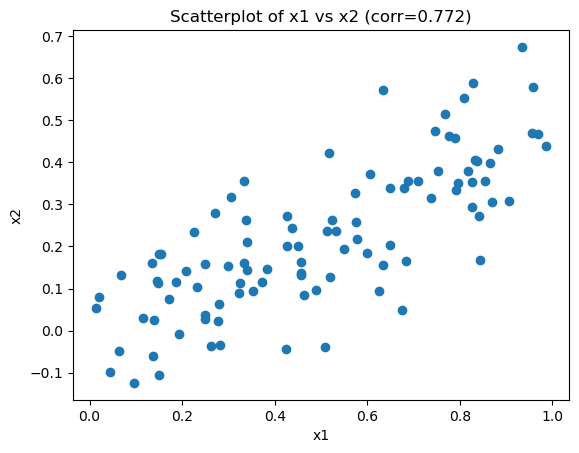

In [29]:
corr = np.corrcoef(x1, x2)[0, 1]
print("Correlation:", corr)

plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Scatterplot of x1 vs x2 (corr={corr:.3f})")
plt.show()

#### c)

In [30]:
import pandas as pd
import statsmodels.api as sm

X = np.column_stack((x1, x2))
X = sm.add_constant(X)
model_full = sm.OLS(y, X).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           5.76e-08
Time:                        17:07:53   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

- $\beta_0$ - close enough,
- $\beta_1$ - not quite there,
- $\beta_2$ - totally wrong 

#### d)

In [31]:
X1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X1).fit()
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.37e-08
Time:                        17:07:53   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

answer: no(ł)

#### e)

In [32]:
X2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X2).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           7.43e-07
Time:                        17:07:53   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

#### f)

They do contradict each other, model from: 
- c) Is not the best at predicting the real model, while it underestimates the importance of $x_1$ it overestimates the importance of $x_2$. How ever the p-value for $x_2$ is quite high, which may suggest that the $x_2$ is not necessary for correct modeling of $y$ (or its impact on it is negligible).
- d) Is the best at predicting $y$. It does not take into account $x_2$, which, as we know, depends on $x_1$, and has negligible impact, compared to $x_1$, on overall value of $y$. 
- e) Is probably the worst at that prediction as it takes into account only $x_2$. From b) we know that values of $x_2$ are slighly smaller than those of $x_1$, so to correctly predict the values of $y$ w need to overestimate the coefficient of $\beta_1$.

#### g)

In [33]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

# Refit all three models
X_full = sm.add_constant(np.column_stack((x1, x2)))
model_full_outlier = sm.OLS(y, X_full).fit()

X1_out = sm.add_constant(x1)
model_x1_out = sm.OLS(y, X1_out).fit()

X2_out = sm.add_constant(x2)
model_x2_out = sm.OLS(y, X2_out).fit()

print("Full model:\n", model_full_outlier.summary())
print("\nX1-only model:\n", model_x1_out.summary())
print("\nX2-only model:\n", model_x2_out.summary())

Full model:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.60e-08
Time:                        17:07:53   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10

We can see that full model is wrong, this observation is both an outlier and high-leverage point, while in other models it is only an outlier because it does not effect the results as much as in full model.

# Excercise 3

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("Auto.csv", na_values="?")
df = df.dropna()

df["origin"] = df["origin"].astype("category")

train, valid = train_test_split(df, test_size=0.3, random_state=42)


In [35]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


#### a)

In [36]:
import statsmodels.formula.api as smf

model = smf.ols("mpg ~ horsepower", data=train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     455.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.55e-60
Time:                        17:07:53   Log-Likelihood:                -823.78
No. Observations:                 274   AIC:                             1652.
Df Residuals:                     272   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0848      0.869     47.255      0.0

#### b)

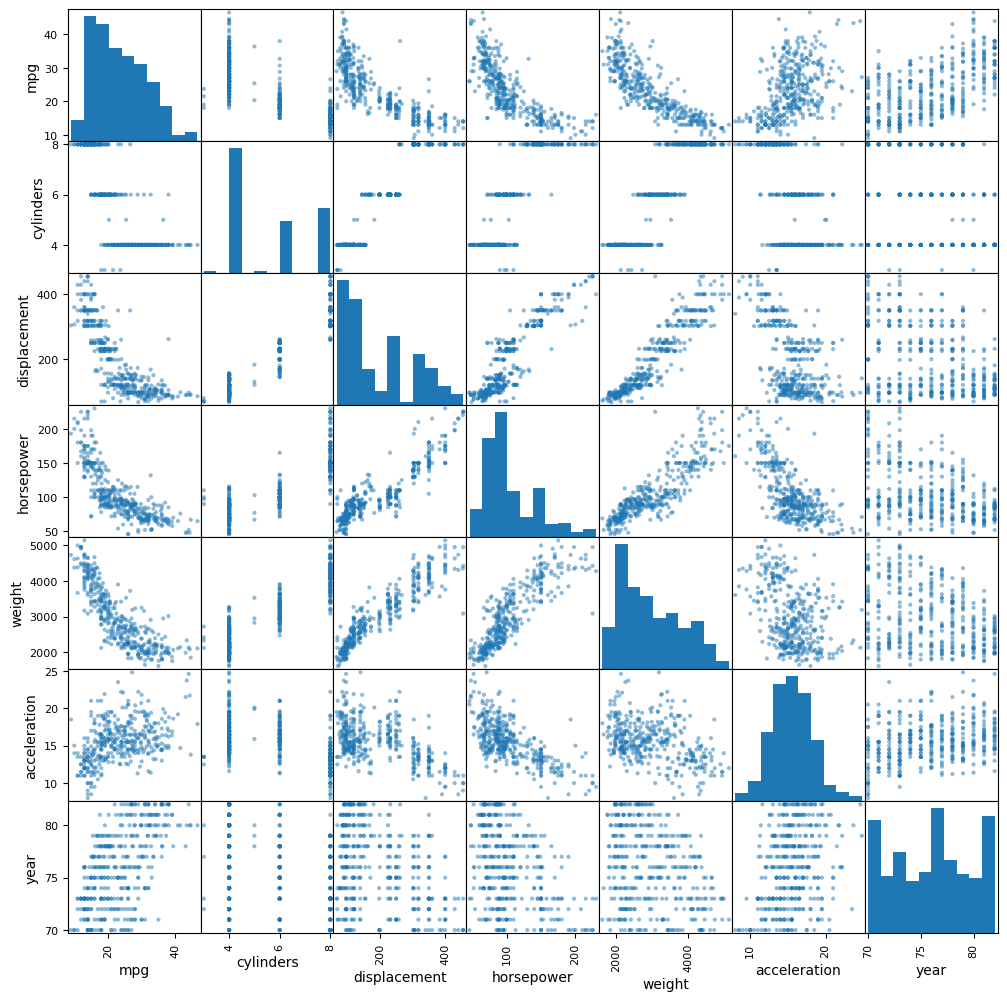

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration      year  
mpg               0.423329  0.580541  
cylinders        -0.504683 -0.345647  
displacement     -0.543800 -0.369855  
horsepower       -0.689196 -0.416361  
weight           -0.416839 -0.309120  
acceleration      1.000000  0.290316  
year              0.290316  1.000000  


In [37]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(12, 12))
plt.show()

corr = df.corr(numeric_only=True)
print(corr)


#### c)

In [38]:
model_full = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=train).fit()
model_inter = smf.ols("mpg ~ horsepower * weight", data=train).fit()
model_inter2 = smf.ols("mpg ~ displacement + I(np.log(weight)) + acceleration:year", data=train).fit()
model_sqrt = smf.ols("mpg ~ I(np.sqrt(weight)) + horsepower + year", data=train).fit()

# model_1 = smf.ols("mpg ~ I(np.log(weight * displacement)) + I(np.sqrt(horsepower)) + acceleration + origin", data=train).fit()
model_1 = smf.ols("mpg ~ horsepower*weight + acceleration + origin + year", data=train).fit()
# model_1 = smf.ols("mpg ~ I(np.sqrt(weight)) * I(np.sqrt(displacement)) + I(np.sqrt(horsepower)) * acceleration + origin", data=train).fit()

print("Full model:\n", model_full.summary())
print("Interaction model:\n", model_inter.summary())
print("Interaction model 2:\n", model_inter2.summary())
print("Square root model:\n", model_sqrt.summary())
print("Model 1:\n", model_1.summary())

Full model:
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     157.8
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           3.78e-96
Time:                        17:07:56   Log-Likelihood:                -718.66
No. Observations:                 274   AIC:                             1455.
Df Residuals:                     265   BIC:                             1488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.7329      5.971 

Błąd generalizacji to błąd popełniany przez model na nowych, niewidzianych danych (zbiorze walidacyjnym).
Jest to najlepsza miara jakości modelu — mówi, jak model radzi sobie w praktyce, a nie tylko na danych treningowych. Najczęsciej to MSE na zbiorze walidacyjnym.

In [39]:
from sklearn.metrics import mean_squared_error

mse_full = mean_squared_error(valid["mpg"], model_full.predict(valid))
mse_inter = mean_squared_error(valid["mpg"], model_inter.predict(valid))
mse_inter2 = mean_squared_error(valid["mpg"], model_inter2.predict(valid))
mse_sqrt = mean_squared_error(valid["mpg"], model_sqrt.predict(valid))
mse_1 = mean_squared_error(valid["mpg"], model_1.predict(valid))

print(mse_full, mse_inter, mse_inter2, mse_sqrt, mse_1)

10.344169215429643 16.875795576607732 15.376459356043894 9.415666682785321 9.406241237584227


#### d)

In [40]:
resid = model_full.resid
z = (resid - resid.mean()) / resid.std()

outlier_mask = np.abs(z) > 3


#### High leverage points

To obserwacje, które mają nietypowe wartości predyktorów.

Formalnie — punkty o wysokich wartościach diagonalnych w macierzy:

$H = X (X^TX)^{-1} X^T$

In [ ]:
influence = model_full.get_influence()
leverage = influence.hat_matrix_diag

lev_threshold = 2 * df.shape[1] / df.shape[0]
leverage_mask = leverage > lev_threshold

high leverage + duże residuals $\rightarrow$ observation is influential (Cook's distance)

In [42]:
cooks_d = influence.cooks_distance[0]
cooks_threshold = 4 / df.shape[0]

cooks_mask = cooks_d > cooks_threshold


In [43]:
print(len(df), len(outlier_mask), len(leverage_mask), len(cooks_mask))
print(model_full.model.data.row_labels)  # indeksy użyte przez model


392 274 274 274
Index([110,  17, 320,  24, 128, 376, 177, 234, 195, 240,
       ...
       216, 122, 396,  20, 190,  72, 107, 272, 352, 103],
      dtype='int64', length=274)


In [44]:
idx = model_full.model.data.row_labels  # indeksy w modelu

outlier_mask_s = pd.Series(outlier_mask, index=idx)
leverage_mask_s = pd.Series(leverage_mask, index=idx)
cooks_mask_s = pd.Series(cooks_mask, index=idx)

# teraz reindex do pełnego df, brakujące uzupełnij False
outlier_mask_s = outlier_mask_s.reindex(df.index, fill_value=False)
leverage_mask_s = leverage_mask_s.reindex(df.index, fill_value=False)
cooks_mask_s = cooks_mask_s.reindex(df.index, fill_value=False)

suspects = df[outlier_mask_s | leverage_mask_s | cooks_mask_s]
print(suspects)


      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
6    14.0          8         454.0       220.0    4354           9.0    70   
8    14.0          8         455.0       225.0    4425          10.0    70   
10   15.0          8         383.0       170.0    3563          10.0    70   
12   15.0          8         400.0       150.0    3761           9.5    70   
13   14.0          8         455.0       225.0    3086          10.0    70   
23   26.0          4         121.0       113.0    2234          12.5    70   
26   10.0          8         307.0       200.0    4376          15.0    70   
27   11.0          8         318.0       210.0    4382          13.5    70   
28    9.0          8         304.0       193.0    4732          18.5    70   
42   12.0          8         383.0       180.0    4955          11.5    71   
44   13.0          8         400.0       175.0    5140          12.0    71   
54   35.0          4          72.0        69.0    1613          

In [45]:
df_clean = df[~(outlier_mask_s | leverage_mask_s | cooks_mask_s)].copy()

print("Original size:", len(df))
print("Cleaned size:", len(df_clean))

Original size: 392
Cleaned size: 339


In [46]:
train_clean, valid_clean = train_test_split(df_clean, test_size=0.3, random_state=42)

In [47]:
model_full_clean = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=train_clean).fit()
model_inter_clean = smf.ols("mpg ~ horsepower * weight", data=train_clean).fit()
model_inter2_clean = smf.ols("mpg ~ displacement + I(np.log(weight)) + acceleration:year", data=train_clean).fit() # acceleration*year = acceleration + year + acceleration:year
model_sqrt_clean = smf.ols("mpg ~ I(np.sqrt(weight)) + horsepower + year", data=train_clean).fit()

# model_1_clean = smf.ols("mpg ~ I(np.log(weight * displacement)) + I(np.sqrt(horsepower)) + acceleration + origin", data=train_clean).fit()
model_1_clean = smf.ols("mpg ~ horsepower*weight + acceleration + origin + year", data=train_clean).fit()
# model_1_clean = smf.ols("mpg ~ I(np.sqrt(weight)) * I(np.sqrt(displacement)) + I(np.sqrt(horsepower)) * acceleration + origin", data=train_clean).fit()

print("Full model:\n", model_full_clean.summary())
print("Interaction model:\n", model_inter_clean.summary())
print("Interaction model 2:\n", model_inter2_clean.summary())
print("Square root model:\n", model_sqrt_clean.summary())
print("Model 1:\n", model_1_clean.summary())

Full model:
                             OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           9.19e-93
Time:                        17:07:56   Log-Likelihood:                -573.34
No. Observations:                 237   AIC:                             1165.
Df Residuals:                     228   BIC:                             1196.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.5866      5.103 

In [48]:
from sklearn.metrics import mean_squared_error

mse_full_clean   = mean_squared_error(valid_clean["mpg"], model_full_clean.predict(valid_clean))
mse_inter_clean  = mean_squared_error(valid_clean["mpg"], model_inter_clean.predict(valid_clean))
mse_inter2_clean = mean_squared_error(valid_clean["mpg"], model_inter2_clean.predict(valid_clean))
mse_sqrt_clean   = mean_squared_error(valid_clean["mpg"], model_sqrt_clean.predict(valid_clean))
mse_1_clean      = mean_squared_error(valid_clean["mpg"], model_1_clean.predict(valid_clean))

print(mse_full_clean, mse_inter_clean, mse_inter2_clean, mse_sqrt_clean, mse_1_clean)

6.0799867082813135 12.241553658114755 12.103802182914034 6.0066526250775985 5.526305077332829


In [49]:
from sklearn.metrics import mean_squared_error

mse_full = mean_squared_error(valid["mpg"], model_full.predict(valid))
mse_inter = mean_squared_error(valid["mpg"], model_inter.predict(valid))
mse_inter2 = mean_squared_error(valid["mpg"], model_inter2.predict(valid))
mse_sqrt = mean_squared_error(valid["mpg"], model_sqrt.predict(valid))
mse_1 = mean_squared_error(valid["mpg"], model_1.predict(valid))

print(mse_full, mse_inter, mse_inter2, mse_sqrt, mse_1)

10.344169215429643 16.875795576607732 15.376459356043894 9.415666682785321 9.406241237584227


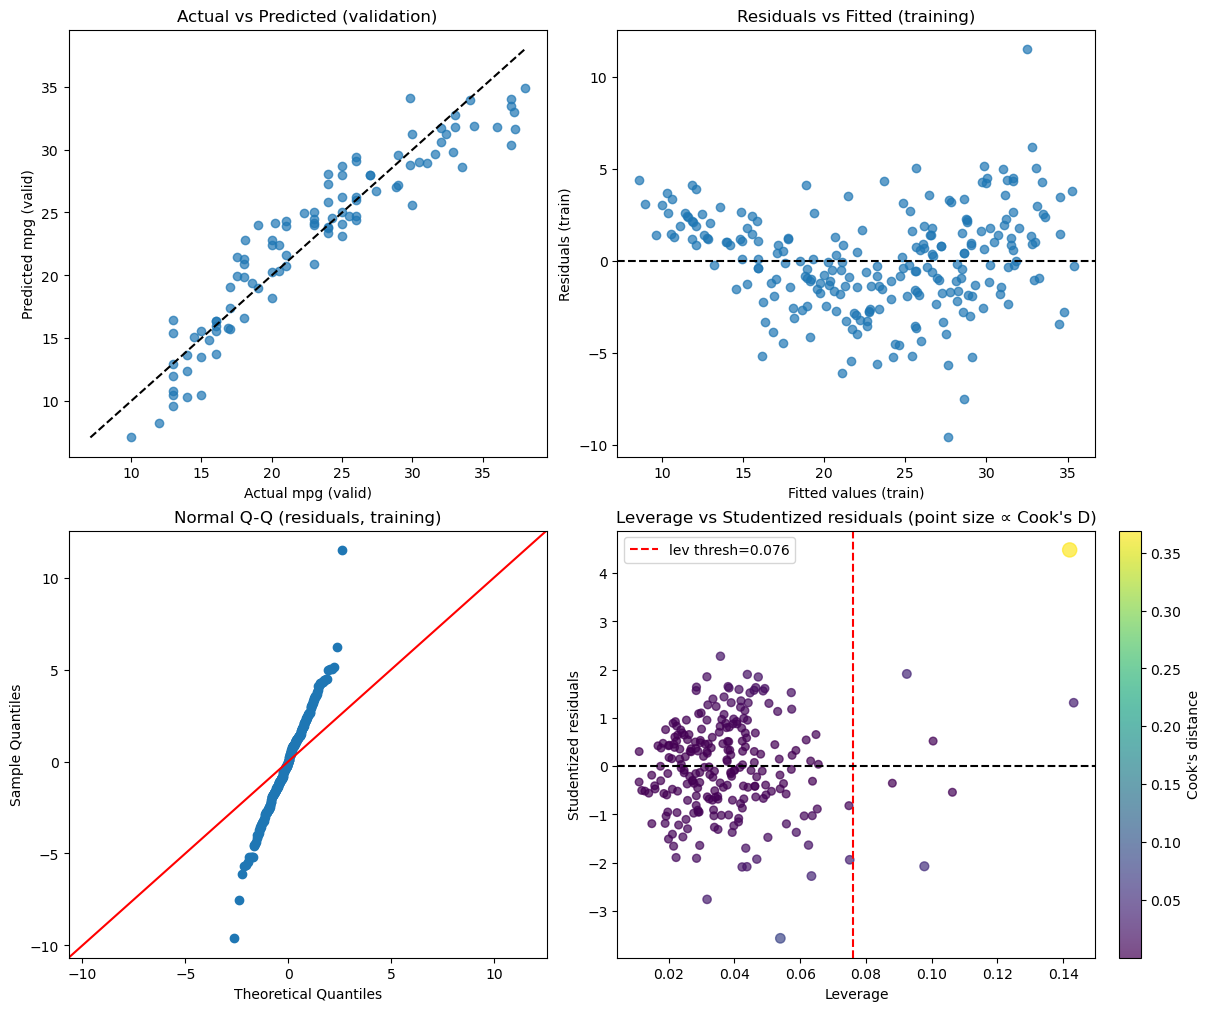

In [51]:
# Plot diagnostics for model_full_clean
# Uses existing variables: model_full_clean, valid_clean, train_clean, plt, sm, stats

# Predictions on validation set
y_valid = valid_clean["mpg"]
y_pred_valid = model_full_clean.predict(valid_clean)

# Influence & leverage for the training model
infl = model_full_clean.get_influence()
leverage = infl.hat_matrix_diag
cooks_d = infl.cooks_distance[0]
std_resid = infl.resid_studentized_internal

# thresholds
n = int(model_full_clean.model.nobs)
p = model_full_clean.model.exog.shape[1]
lev_threshold = 2 * p / n
cooks_threshplotold = 4 / n

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# 1) Actual vs Predicted (validation)
ax = axes[0, 0]
ax.scatter(y_valid, y_pred_valid, alpha=0.7)
lims = (min(y_valid.min(), y_pred_valid.min()), max(y_valid.max(), y_pred_valid.max()))
ax.plot(lims, lims, color="k", linestyle="--")
ax.set_xlabel("Actual mpg (valid)")
ax.set_ylabel("Predicted mpg (valid)")
ax.set_title("Actual vs Predicted (validation)")

# 2) Residuals vs Fitted (training)
ax = axes[0, 1]
fitted = model_full_clean.fittedvalues
resid = model_full_clean.resid
ax.scatter(fitted, resid, alpha=0.7)
ax.axhline(0, color="k", linestyle="--")
ax.set_xlabel("Fitted values (train)")
ax.set_ylabel("Residuals (train)")
ax.set_title("Residuals vs Fitted (training)")

# 3) QQ plot of residuals (training)
ax = axes[1, 0]
sm.qqplot(resid, line="45", ax=ax)
ax.set_title("Normal Q-Q (residuals, training)")

# 4) Leverage vs. Cook's distance (training)
ax = axes[1, 1]
sc = ax.scatter(leverage, std_resid, s=30 + 200 * cooks_d, c=cooks_d, cmap="viridis", alpha=0.7)
ax.axvline(lev_threshold, color="r", linestyle="--", label=f"lev thresh={lev_threshold:.3f}")
ax.axhline(0, color="k", linestyle="--")
ax.set_xlabel("Leverage")
ax.set_ylabel("Studentized residuals")
ax.set_title("Leverage vs Studentized residuals (point size ∝ Cook's D)")
ax.legend()
cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("Cook's distance")

plt.show()